### Introduction to handling LCO data through jupyter notebook

In [13]:
%matplotlib inline

In [14]:
#pip install astropy

In [15]:
from astropy.io import fits
from astropy import wcs
import aplpy

In [16]:
filename = 'SStars-e91.fits.fz'

Using an image of standard stars as our test image. 

In [17]:
hdu = fits.open(filename)

In [18]:
hdu.info()

Filename: SStars-e91.fits.fz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SCI           1 CompImageHDU    267   (3054, 2042)   float32   
  2  CAT           1 BinTableHDU    121   59R x 38C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D]   
  3  BPM           1 CompImageHDU      9   (3054, 2042)   uint8   
  4  ERR           1 CompImageHDU     10   (3054, 2042)   float32   


In [19]:
hdu[1].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3054                                                  
NAXIS2  =                 2042                                                  
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
XTENSION= 'BINTABLE'           / binary table extension                         
ZDITHER0=                 3370 / dithering offset when quantizing floats        
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'lsc     '        

In [20]:
hdu[2].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  304 / length of dimension 1                          
NAXIS2  =                   59 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                   38 / number of table fields                         
TTYPE1  = 'x       '                                                            
TFORM1  = 'D       '                                                            
TUNIT1  = 'pix     '                                                            
TTYPE2  = 'y       '                                                            
TFORM2  = 'D       '        

Load the data file, then select the HDU with the frame data.

Now we are going to use the photometry information from the 3rd HDU. If you want to see all the column headers:

In [21]:
hdu[3].header

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 3054                                                  
NAXIS2  =                 2042                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'BPM     '                                                            
EXTVER  =                    1                                                  

The photometry is stored in x,y positions not RA and Dec so let's convert it

We need to use the WCS info from the image HDU FITS header

In [22]:
w = wcs.WCS(hdu[2].header)

Now use this to convert the X and Y data into RA and Dec.

In [23]:
x = hdu[2].data.field(0) 
y = hdu[2].data.field(1) 
ra, dec = w.wcs_pix2world(x, y, 1)  

Let's use the APLpy library to display the FITS image with the photometry data overlayed

We can also use information from one of the other columns, like the peak intensity. We'll use that value to change the size and colour of the points.

Set OBSGEO-B to   -30.167703 from OBSGEO-[XYZ].
Set OBSGEO-H to     2197.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -4.138e+01 [aplpy.core]
INFO: Auto-setting vmax to  9.298e+01 [aplpy.core]


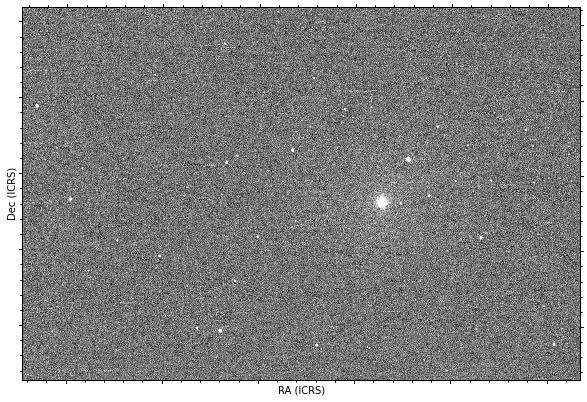

In [24]:
from numpy import log
new_vals = log(hdu[2].data.field(8))**2 #apply log and stretch with a ^2
f = aplpy.FITSFigure(hdu[1])
f.show_grayscale()
f.show_markers(ra, dec, c=new_vals
               , s=new_vals)